In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\laptop_purchase_data_india.csv")
df.head()

,Customer_ID,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Price_Range,Payment_Mode,Purchase_Frequency,Satisfaction_Rating
0,CUST00001,56,Male,Pune,Low,Online,Dell,30K-50K,UPI,Rare,4
1,CUST00002,46,Female,Kolkata,Medium,Online,MSI,Below 30K,Cash,Occasional,2
2,CUST00003,32,Male,Bangalore,Low,Online,Samsung,80K-1.2L,UPI,Occasional,3
3,CUST00004,25,Female,Jaipur,Medium,Offline,Samsung,Below 30K,Credit Card,Rare,4
4,CUST00005,38,Female,Pune,High,Online,MSI,80K-1.2L,Cash,Rare,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          5000 non-null   object
 1   Age                  5000 non-null   int64 
 2   Gender               5000 non-null   object
 3   City                 5000 non-null   object
 4   Income_Level         5000 non-null   object
 5   Purchase_Mode        5000 non-null   object
 6   Brand_Purchased      5000 non-null   object
 7   Price_Range          5000 non-null   object
 8   Payment_Mode         5000 non-null   object
 9   Purchase_Frequency   5000 non-null   object
 10  Satisfaction_Rating  5000 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 429.8+ KB


In [5]:
df.isnull().sum()

Customer_ID            0
Age                    0
Gender                 0
City                   0
Income_Level           0
Purchase_Mode          0
Brand_Purchased        0
Price_Range            0
Payment_Mode           0
Purchase_Frequency     0
Satisfaction_Rating    0
dtype: int64

In [6]:
df.set_index("Customer_ID", inplace=True)
df.head()

,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Price_Range,Payment_Mode,Purchase_Frequency,Satisfaction_Rating
Customer_ID,,,,,,,,,,
CUST00001,56,Male,Pune,Low,Online,Dell,30K-50K,UPI,Rare,4
CUST00002,46,Female,Kolkata,Medium,Online,MSI,Below 30K,Cash,Occasional,2
CUST00003,32,Male,Bangalore,Low,Online,Samsung,80K-1.2L,UPI,Occasional,3
CUST00004,25,Female,Jaipur,Medium,Offline,Samsung,Below 30K,Credit Card,Rare,4
CUST00005,38,Female,Pune,High,Online,MSI,80K-1.2L,Cash,Rare,3


In [7]:
df["Income_Level"].value_counts()

Income_Level
Medium    2540
Low       1464
High       996
Name: count, dtype: int64

In [8]:
df["Brand_Purchased"].value_counts()

Brand_Purchased
Lenovo     674
Asus       638
MSI        635
Samsung    624
Acer       624
HP         612
Apple      604
Dell       589
Name: count, dtype: int64

In [9]:
df["Payment_Mode"].value_counts()

Payment_Mode
EMI            1089
Debit Card     1048
Credit Card     971
UPI             946
Cash            946
Name: count, dtype: int64

In [10]:
df["Purchase_Frequency"].value_counts()

Purchase_Frequency
Rare          3012
Occasional    1474
Frequent       514
Name: count, dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
categorical_cols = ['Gender', 'City', 'Income_Level', 'Purchase_Mode', 'Brand_Purchased', 'Price_Range', 'Payment_Mode', 'Purchase_Frequency']
for col in categorical_cols:
    df[col] = df[col].astype('category')

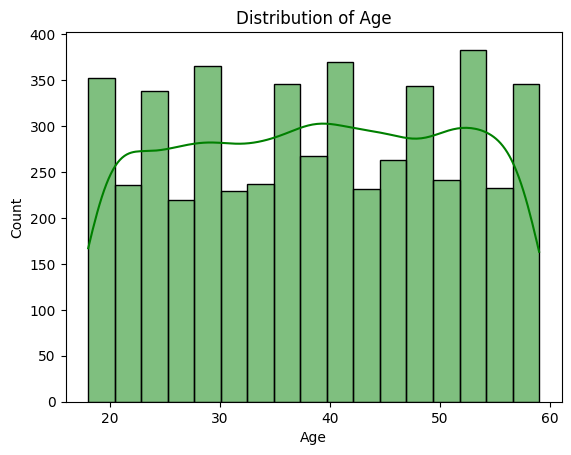

In [13]:
sns.histplot(df['Age'], kde=True, color='green')
plt.title('Distribution of Age')
plt.show()

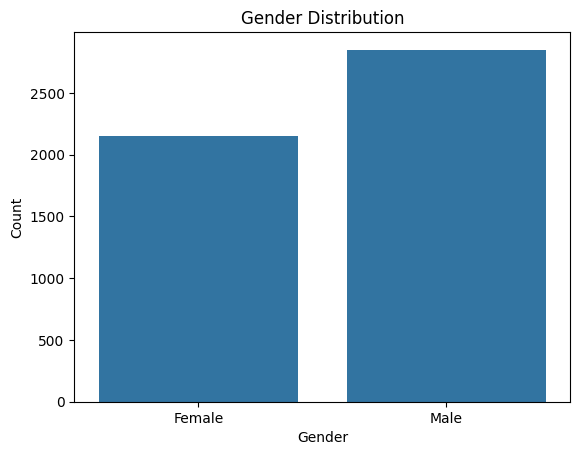

In [14]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

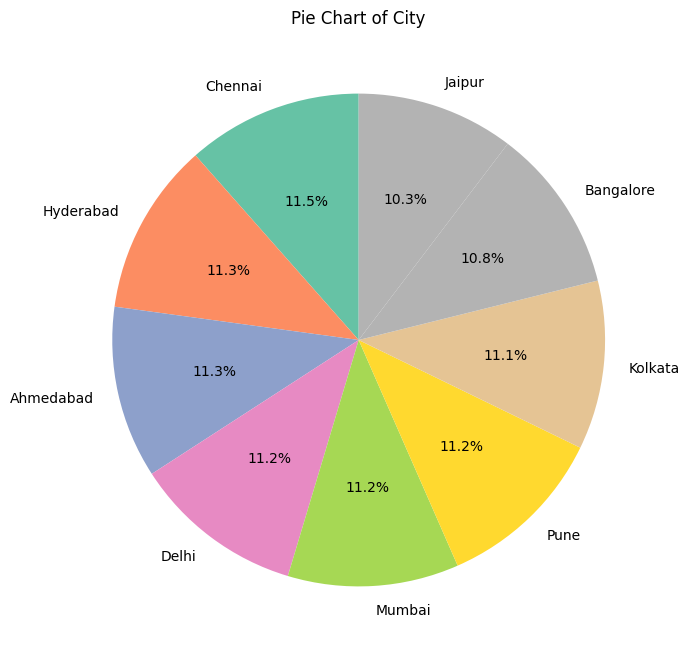

In [15]:
data = df['City'].value_counts()
data.plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=90, cmap='Set2')
plt.title('Pie Chart of City')
plt.ylabel('')
plt.show()

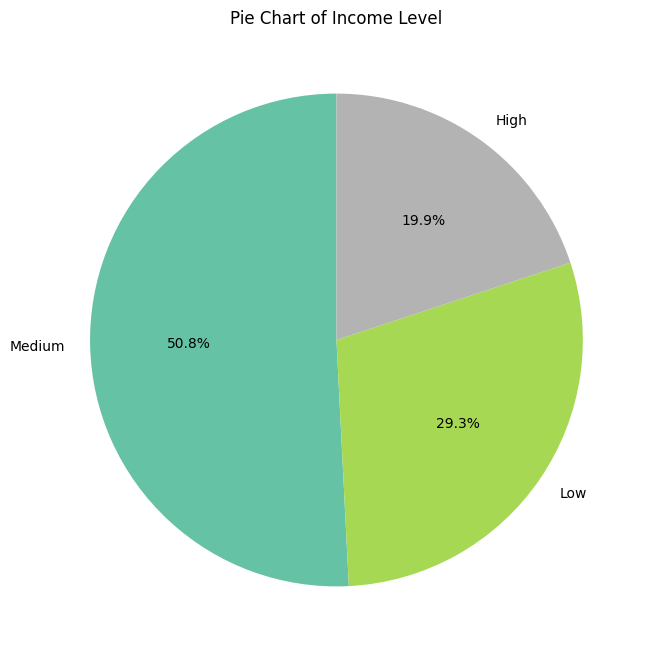

In [16]:
data = df['Income_Level'].value_counts()
data.plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=90, cmap='Set2')
plt.title('Pie Chart of Income Level')
plt.ylabel('')
plt.show()

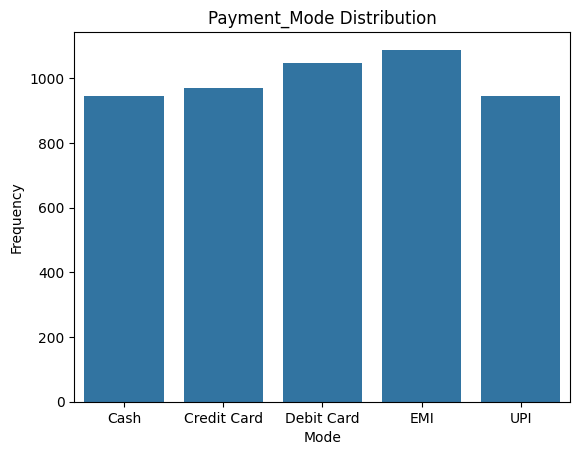

In [17]:
sns.countplot(x='Payment_Mode', data=df)
plt.title('Payment_Mode Distribution')
plt.xlabel('Mode')
plt.ylabel('Frequency')
plt.show()

In [18]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

In [19]:
features = ['Age','Gender','Income_Level','Purchase_Mode','Brand_Purchased','Price_Range','Payment_Mode','Purchase_Frequency']
new_features = ['Age']
# We need to encode categorical data
encoder = LabelEncoder()
for feature in features[1:]:
    df[feature] =encoder.fit_transform(df[feature])
    new_features.append(feature)
X = df[new_features]
y = df['Satisfaction_Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"The accuracy of our model is {accuracy} with the given confusion matrix", conf_matrix)

The accuracy of our model is 0.196 with the given confusion matrix [[39 53 42 35 38]
 [34 41 46 25 48]
 [49 34 40 33 34]
 [40 48 44 34 40]
 [49 47 31 34 42]]


===================================# VIEWING AND INSPECTING DATA =================================== 

---------- # FIRST 5 ROWS # -----------
   Customer_ID  Age  Gender       City Income_Level Purchase_Mode  \
0   CUST00001   56    Male       Pune          Low        Online   
1   CUST00002   46  Female    Kolkata       Medium        Online   
2   CUST00003   32    Male  Bangalore          Low        Online   
3   CUST00004   25  Female     Jaipur       Medium       Offline   
4   CUST00005   38  Female       Pune         High        Online   

  Brand_Purchased Price_Range Payment_Mode Purchase_Frequency  \
0            Dell     30K-50K          UPI               Rare   
1             MSI   Below 30K         Cash         Occasional   
2         Samsung    80K-1.2L          UPI         Occasional   
3         Samsung   Below 30K  Credit Card               Rare   
4             MSI    80K-1.2L         Cash               Rare   

   Satisfaction_Rating  
0                    4  
1     

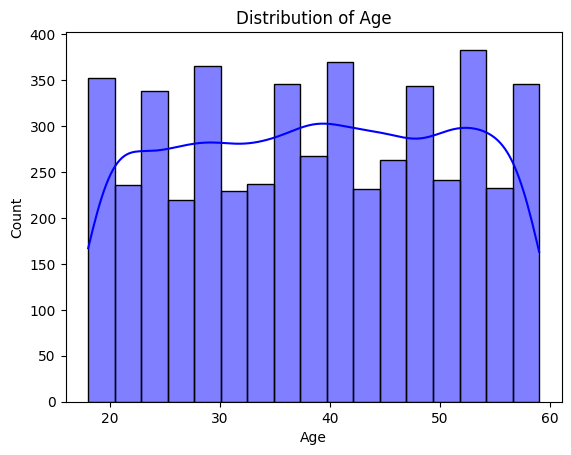

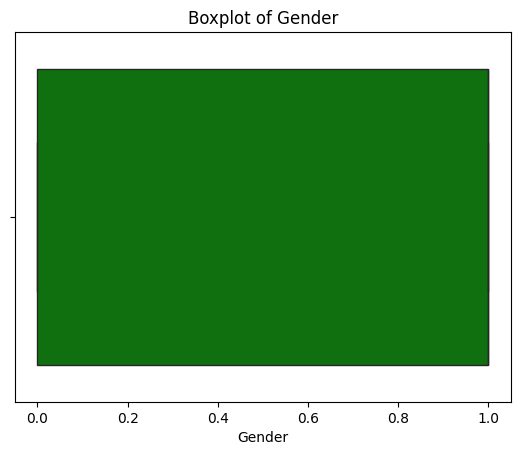

C:\Users\dell\AppData\Local\Temp\ipykernel_5868\3624024237.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['City'], palette='viridis')


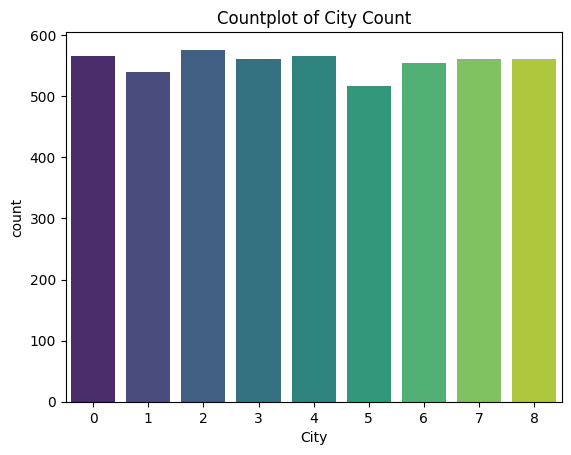

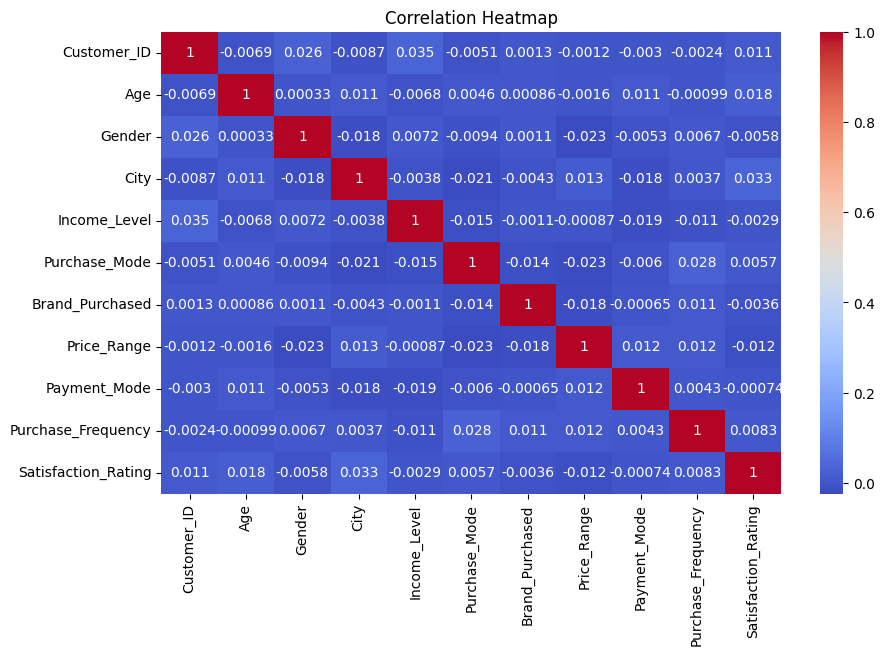

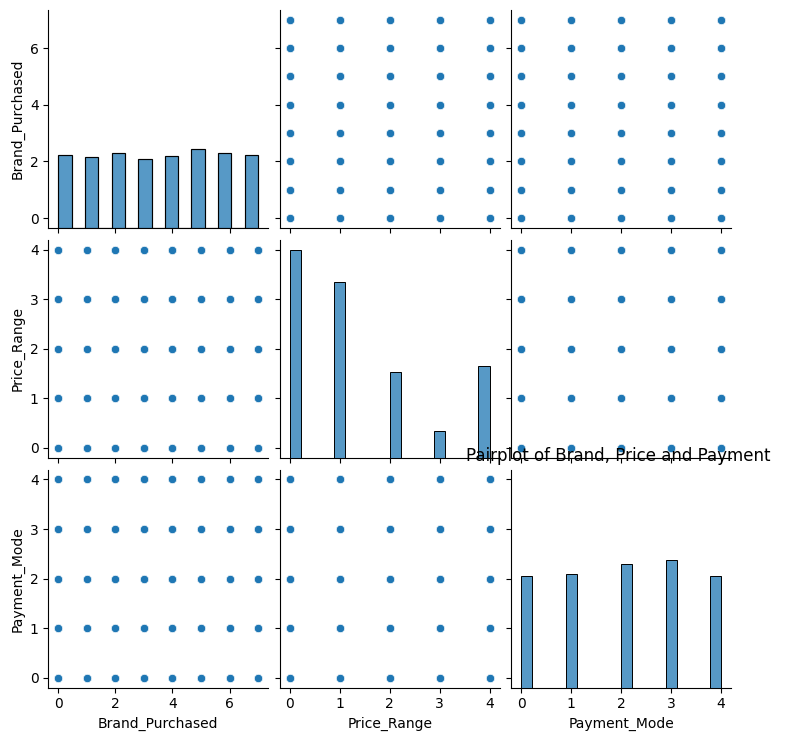

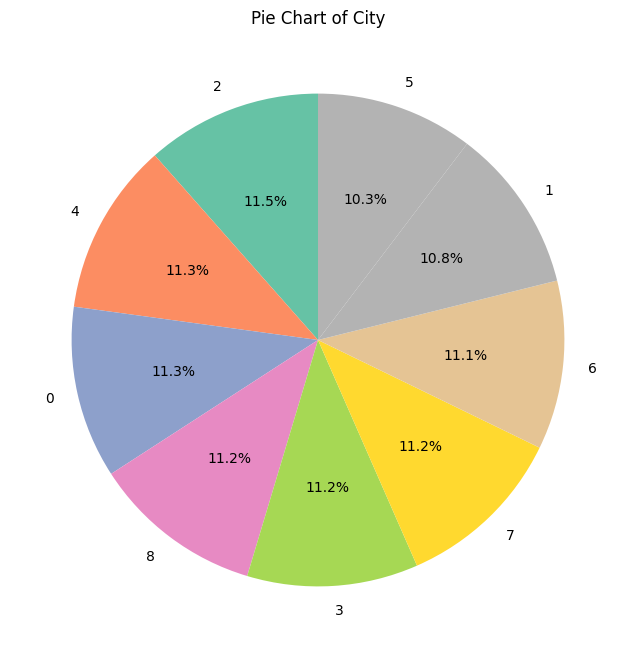

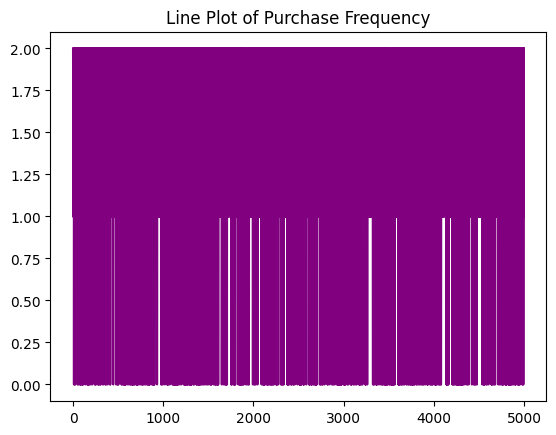

Visualizations completed.

===================================# ADABOOST CLASSIFIER # ===================================
Accuracy of AdaBoost Classifier: 0.21


In [20]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score


# Import Data 

mydata = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\laptop_purchase_data_india.csv')
df = pd.DataFrame(mydata)

# Imported Data Insights 
print("===================================# VIEWING AND INSPECTING DATA =================================== \n")
print("---------- # FIRST 5 ROWS # -----------\n",df.head())
print("---------- #  LAST 5 ROWS# # -----------\n",df.tail())
print("---------- #  SUMMARY OF THE DATAFRAME# # -----------\n",df.info())
print("---------- #  STATISTICS OF NUMERICAL COLUMNS# # -----------\n",df.describe())
print("---------- #  SHAPE OF THE DATAFRAME# # -----------\n",df.shape)
print("---------- #  LIST OF COLUMN NAMES# # -----------\n",df.columns)
print("---------- #  DATA TYPES OF COLUMNS# # -----------\n",df.dtypes)
print("---------- #  RANDOM 5 ROWS# # -----------\n",df.sample(5))

# Data Handling
print("---------- #  NULL VALUE INFO # -----------\n",df.isnull().sum())


print("===================================# DATA HANDLING # =================================== \n")
print("---------- # ENCODING DATA # -----------\n")
object_columns = df.select_dtypes(include=['object']).columns
print(f"\n Data for these Columns to be Encoded:\n {object_columns}")


encoder = LabelEncoder()
for columns in object_columns:
    df[columns] =encoder.fit_transform(df[columns])
    print(f"{columns} is ENCODED >>>>")

print("Data is saved to a new CSV File")
encoded_file = "laptop_purchase_data_india_encoded.csv"
df.to_csv(encoded_file, index=False)
print(f"\nEncoded data saved to: {encoded_file}")
print(f"A Sample of the Encoded Data:\n{df.head()}")

#Visualization
print("\n===================================# VISUALIZATIONS # ===================================")

# 1. Distribution of a Age column 
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Distribution of Age')
plt.show()

# 2. Boxplot of a Gender
sns.boxplot(x=df['Gender'], color='green')
plt.title('Boxplot of Gender')
plt.show()

# 3. Countplot for a categorical column
sns.countplot(x=df['City'], palette='viridis')
plt.title('Countplot of City Count')
plt.show()

# 4. Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 5. Pairplot for selected columns
sns.pairplot(df, vars=['Brand_Purchased','Price_Range','Payment_Mode'])
plt.title('Pairplot of Brand, Price and Payment ')
plt.show()

# # 6. Barplot of mean values grouped by a categorical column
# sns.barplot(x='Most_Watched_Category', y='Device_Used', data=df, ci=None, palette='mako')
# plt.title('Mean Customer Most Watched by Device Used')
# plt.show()

# 7. Pie chart for categorical data
data = df['City'].value_counts()
data.plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=90, cmap='Set2')
plt.title('Pie Chart of City')
plt.ylabel('')
plt.show()

#8. Line plot of a numerical column over index
plt.plot(df['Purchase_Frequency'],color='purple')
plt.title('Line Plot of Purchase Frequency')
plt.show()

print("Visualizations completed.")

#  Machine Learning Model 

# AdaBoost Classifier
print("\n===================================# ADABOOST CLASSIFIER # ===================================")

features = ['Age','Gender','Income_Level','Purchase_Mode','Brand_Purchased','Price_Range','Payment_Mode','Purchase_Frequency']

X = df[features]
y = df['Satisfaction_Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

# Predictions and evaluation
y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost Classifier: {accuracy:.2f}")